# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
print("Кількість даних в наборі:", df.shape)
print("Період даних: з", df.index.min(), "до", df.index.max())
print("Періодичність записів:", df.index.to_series().diff().value_counts().head())
df.head()

Кількість даних в наборі: (10886, 19)
Період даних: з 2011-01-01 00:00:00 до 2012-12-19 23:00:00
Періодичність записів: datetime
0 days 01:00:00     10820
0 days 02:00:00        36
12 days 01:00:00       13
11 days 01:00:00        8
0 days 03:00:00         5
Name: count, dtype: int64


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


## Відповіді
1. Кількість даних в наборі - 10886 рядків та 19 колонок, 
2. Період охоплення даних - з 1 січня 2011 по 19 грудня 2012
3. Рівень деталізації - щогодинні записи
4. Найчастіше зустрічаються записи проміжком в 1 годину, рідко - 2 та 3 години; 
також є аномальні записи про 12 та 11 днів, що може свідчити про те, що десь є 
можливі пропущені дані

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


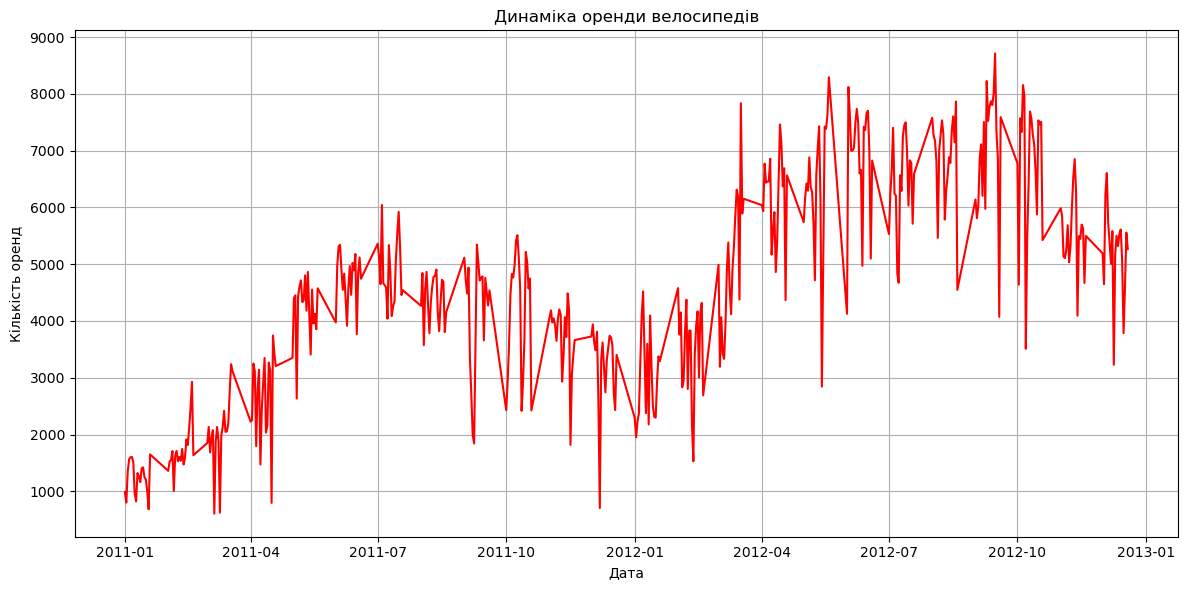

In [15]:
daily_counts = df['count'].resample('D').sum()

plt.figure(figsize=(12,6))
daily_count.plot(
    title='Динаміка оренди велосипедів',
    color='red',
    xlabel='Дата',
    ylabel='Кількість оренд',
    grid=True,
);
plt.tight_layout()

## Відповіді
1. Можлива причина заломів - відсутність даних в певні дні або аномальні значення, які могли бути спричинені збоями в додатку/святковими днями/екстремальними погодними умовами. Як можна прибрати заломи: використати функцію rolling average
2. З загальних тендецій спостерігається зростання кількости оренд в теплі місяці (з середини весни по середину осені) і зменшення в холодні місяці. Також спостерігається поступове загальне збільшення кількості аренд, що може свідчити про зростання популярності сервісу.
3. Так, дуже помітні і є цілком логічними для нашого сервісу.
4. Аномальні значення є, низькі можуть бути спричинені погодними умовами, збоями додатку тощо; високі значення можуть бути спричинені вихідними днями, хорошими погодними умовами, якимись тематичними подіями, акціями і т.д.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

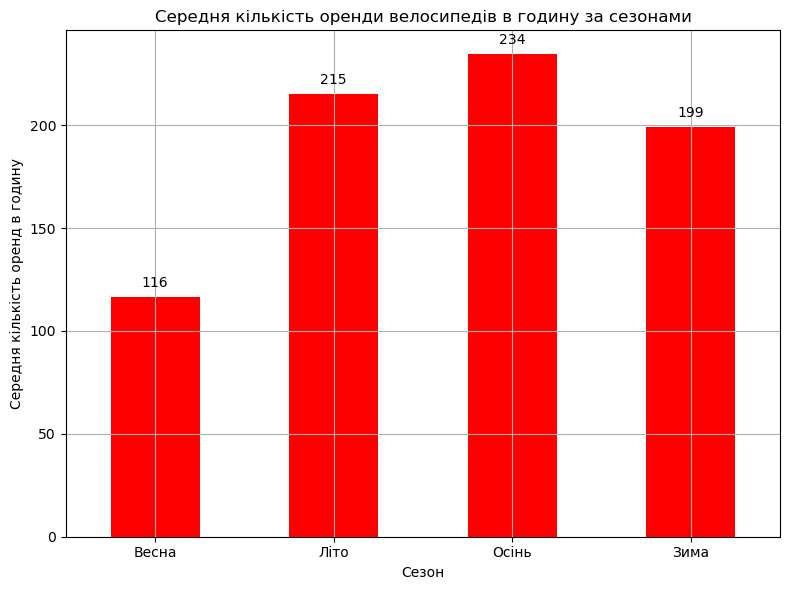

In [24]:
season_order = ['Весна', 'Літо', 'Осінь', 'Зима']
df['season_name'] = pd.Categorical(df['season'].map({1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}), categories=season_order, ordered=True)
season_avg = df.groupby('season_name', observed=True)['count'].mean()
plt.figure(figsize=(8,6))
ax = season_avg.plot(
    kind='bar',
    color='red',
    title='Середня кількість оренди велосипедів в годину за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд в годину',
    grid=True
)
for i, val in enumerate(season_avg):
    ax.text(i, val + 5, f'{val:.0f}', ha='center')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Відповіді
1. Найбільша середня кількість оренди велосипедів спостерігається в осінній сезон. Трохи менше значення в літній сезон.
2. Така сезонна закономірність може бути зумовлена кліматичними особливостями місцевості, де надаються послуги. Наприклад, навесні ще може бути прохолодно, а восени клімат оптімальний для прогулянок на свіжому повітрі. Також треба подивитись, хто наша цільова аудиторія, бо, наприклад, якщо ми маємо велику частку школярів, то вочевидь весною вони зайняти підготовкою до іспитів, влітку вони разом з батьками можуть розїжджатись на канікули та відпустки, а восени повертаються та проводять час з друзями на свіжому повітрі, або ж використовують велосипед як транспортний засіб щоб дістатись до школи.
3. Оренда між найпопулярнішим та найменш популярним сезоном відрізняється у 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


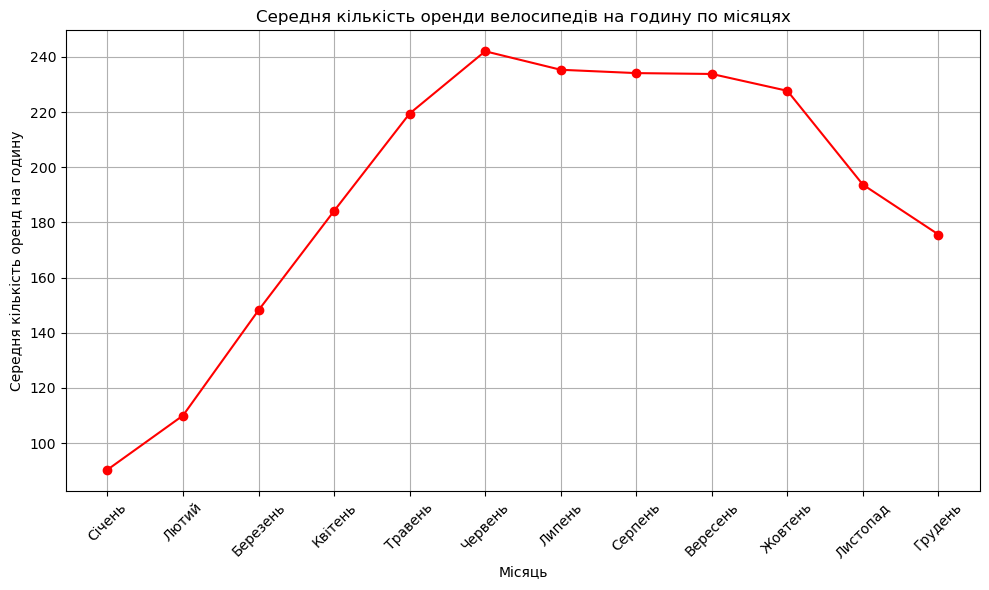

In [28]:
monthly_avg = df.groupby('month')['count'].mean()
plt.figure(figsize=(10,6))
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    color='red',
    title='Середня кількість оренди велосипедів на годину по місяцях',
    xlabel='Місяць',
    ylabel='Середня кількість оренд на годину',
    grid=True
)

months_labels = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень',
                 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']
ax.set_xticks(range(1,13))
ax.set_xticklabels(months_labels, rotation=45)
plt.tight_layout()
plt.show()

## Відповіді
1. Пік оренди спостерігається в літні місяці, особливо в червні, а спад в холодні місяці, особливо в січні та лютому?
2. Отримана закономірність не зовсім співпадає з результатами з попереднього завдання, але на це є свої причини, які на мою думку полягають в різних способах агрегації. Бо, наприклад, розраховуючи по сезонах середнє за зимовий період, ми ділимо на менше число, бо взимку менше днів, ніж навесні.
3. Клімат напряму впливає на оренду велосипедів протягом року, бо чим комфортніші погодні умови - тим більша вірогідність, що людина скористається велосипедом. Очевидно, що якщо на вулиці дощ/туман/град і тд, то це викличе проблеми з пересуванням на велосипеді, тому більшість людей уникають поїздок в поганих погодних умовах.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

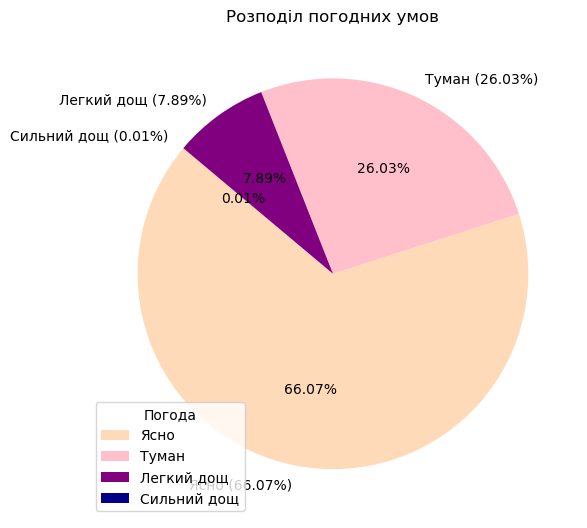

In [40]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ',
}
weather_counts = df['weather'].value_counts().sort_index()
weather_percent = weather_counts / weather_counts.sum() * 100
colors = ['peachpuff', 'pink', 'purple', 'darkblue']
plt.figure(figsize=(6, 6))
plt.pie(
    weather_counts,
    labels=[f"{weather_labels[i]} ({weather_percent[i]:.2f}%)" for i in weather_counts.index],
    colors=colors,
    autopct='%.2f%%',
    startangle=140
)
plt.title('Розподіл погодних умов')
plt.legend(weather_labels.values(), title="Погода")
plt.tight_layout()

## Відповіді
1. В датасеті переважає ясна погода - її частка 66.1%
2. Днів з сильним дощем немає, їх частка - 0.01%, можливо було кілька годин з сильним дощем.
3. Погодні умови напряму впливають на попит на оренду велосипедів. Чим краща погода - тим більше попит на оренду; чим гірша погода - тим менше попит. Детальніше вже розкривалось це питання в попередніх завданнях.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

<Figure size 1000x600 with 0 Axes>

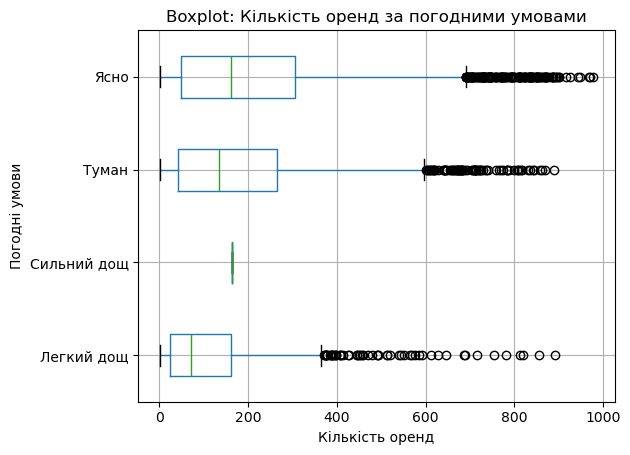

In [41]:
df['weather_name'] = df['weather'].map(weather_labels)
plt.figure(figsize=(10, 6))
df.boxplot(
    column='count',
    by='weather_name',
    vert=False
)
plt.title('Boxplot: Кількість оренд за погодними умовами')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.tight_layout()

## Відповіді
1. Найбільший розкид спостерігається при ясній погоді, що цілком логічно, бо в таку погоду найбільша кількість оренд.
2. Викиди є при будь-якій погоди, окрім сильного дощу, який у нас був майже відсутній. Найбільша кількість випадів при ясній погоді та тумані. Скоріш за все це великий попит в окремі дні/години.
3. Медіанне значення оренди найвище при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

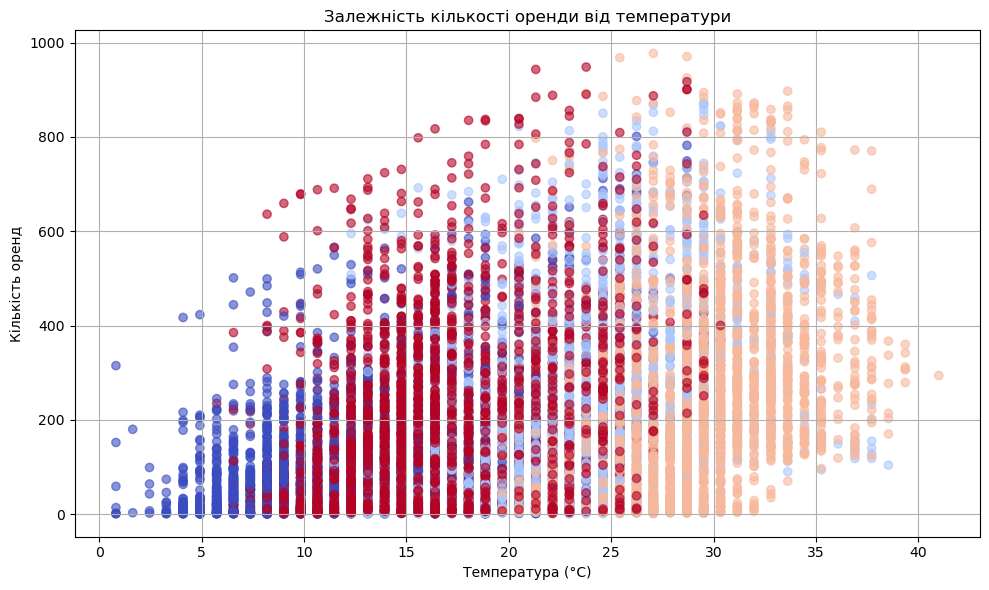

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['temp'],
    df['count'],
    c=df['season'],
    alpha=0.6,
    cmap='coolwarm'
)
plt.title('Залежність кількості оренди від температури')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()

## Відповіді
1. Спостерігається позитивна кореляція. При зростанні температури (до певної межі десь в 30 градусів) зростає кількість оренд. Далі число оренд зменшується через занадто спекотні умови.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

<Figure size 1200x600 with 0 Axes>

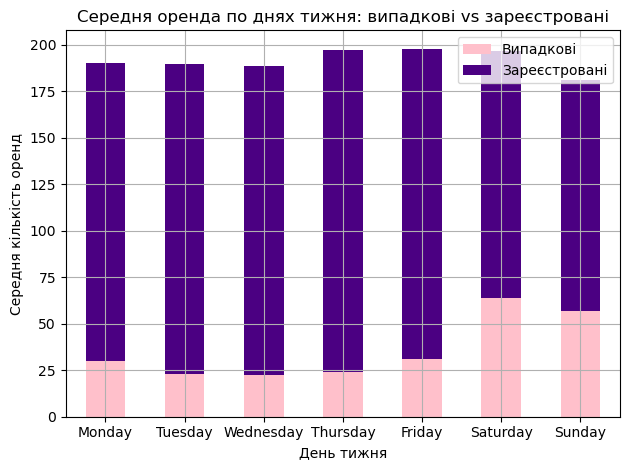

In [54]:
user_weekday = df.groupby('weekday')[['casual', 'registered']].mean()
user_weekday = user_weekday.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 6))
user_weekday.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'indigo'],
    xlabel='День тижня',
    ylabel='Середня кількість оренд',
    title='Середня оренда по днях тижня: випадкові vs зареєстровані',
    grid=True
)
plt.legend(['Випадкові', 'Зареєстровані'])
plt.xticks(rotation=0)
plt.tight_layout()

## Відповіді
1. Більше оренд від зареєстрованих користувачів спостерігається в п'ятницю, четвер та суботу. Можна припустити, що зареєстровані користувачі активно використовують по буднях для поїздок на роботу наприклад.
2. Зареєстровані користувачі демонструють дуже близькі значення, тобто складно сказати, що у них оренда сильно залежить від дня тижня. А от у випадкових користувачів чітко спостерігається, що пік їх активності приходиться на вихідні, що цілком логічно, бо в такі дні багато людей мають вільний час та хочусь провести його цікаво.
